In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps

from src.V1_Compress import generate_Y, compress
import pandas as pd
import itertools
import dask
from dask.distributed import Client, progress
import seaborn as sns
import time
import os.path

In [2]:
## Check if this function is applicable to regular compress sensing
classical_img = Image.open("image/tree_part1.jpg")
classical_img = ImageOps.grayscale(classical_img)
classical_arr = np.asarray(classical_img)
cn, cm = classical_arr.shape
print(cn, cm)
classical_samp_list = [100, 200, 500] #np.floor (cn * cm * 0.20).astype(int)


30 30


sample at:  100


/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.484425770806894, tolerance: 32.310051
  model = cd_fast.enet_coordinate_descent(


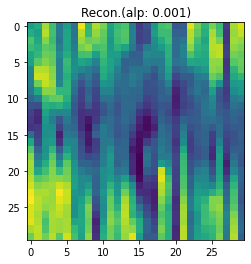

/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.79047288169924, tolerance: 28.365716000000006
  model = cd_fast.enet_coordinate_descent(


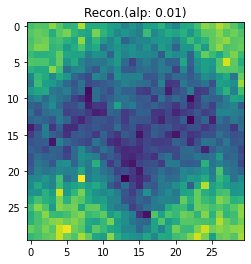

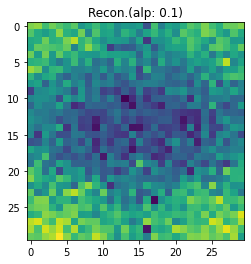

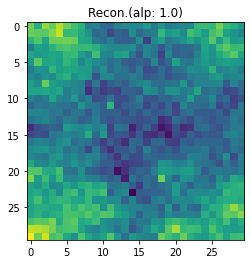

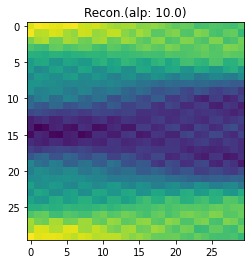

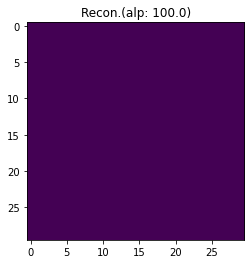

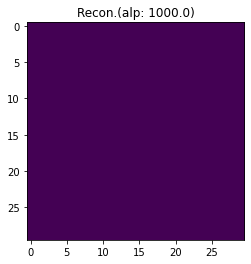

sample at:  200


/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.55940244297867, tolerance: 62.613487500000005
  model = cd_fast.enet_coordinate_descent(


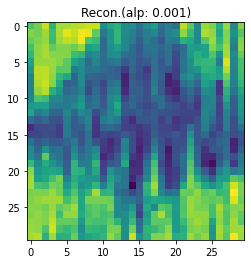

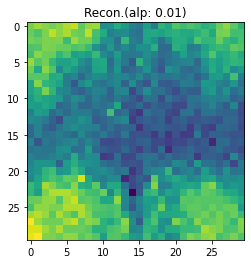

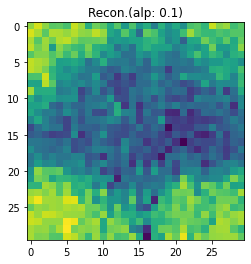

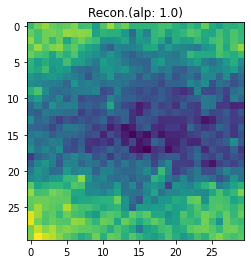

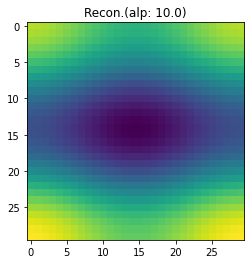

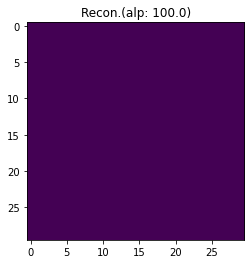

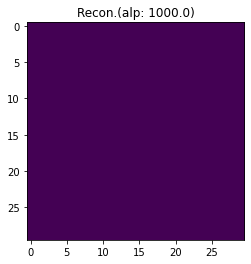

sample at:  500


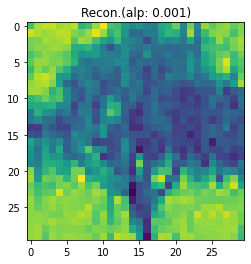

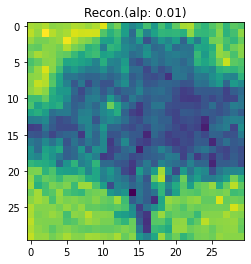

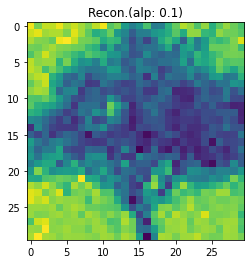

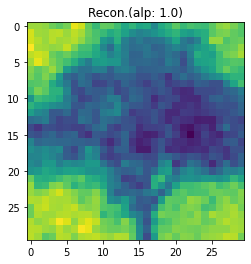

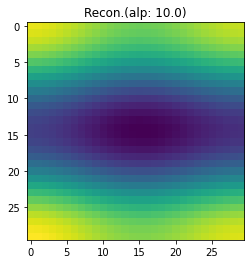

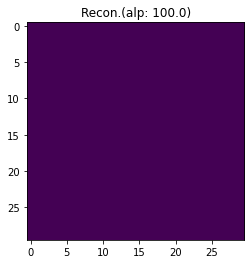

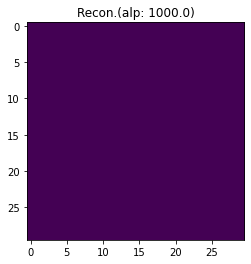

In [8]:
alpha_list = np.logspace(-3, 3, 7)

for classical_samp in classical_samp_list:
    print('sample at: ', classical_samp)
    for alp in alpha_list:
        # Generate random indexes and find corresponding y value for each index
        rand_index = np.random.permutation(cn * cm)[:classical_samp]
        classical_Y = classical_arr.flatten()[rand_index]
        classical_Y = classical_Y.reshape(classical_samp, 1)

        # Generate C matrix
        C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
        C3D = C.reshape(classical_samp, cn, cm)
        theta, classical_reform, s = compress(C3D, classical_Y, alp)

        plt.imshow(classical_reform)
        plt.title("Recon.(alp: " + str(alp) + ")")
        plt.show()

In [93]:
rand_index = np.random.permutation(cn * cm)[:500]
classical_Y = classical_arr.flatten()[rand_index]
classical_Y = classical_Y.reshape(500, 1)

# Generate C matrix
C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
C3D = C.reshape(500, cn, cm)
theta, classical_reform, s = compress(C3D, classical_Y, 0.003)



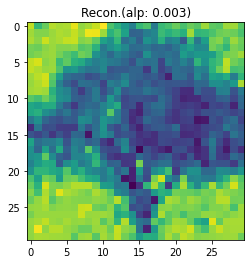

In [98]:
plt.imshow(classical_reform * np.sqrt(cn * cm))
plt.title("Recon.(alp: 0.003)")
plt.show()

array([[  65.21482857,   76.64220186,   62.50199528,   82.52167672,
          72.54201856,   74.53269419,   82.59211216,   80.57872646,
          80.75007318,   82.56786255,   99.50114281,   44.53443586,
          25.13075918,    7.60785747,  -16.38232724,   20.4693597 ,
          42.52634162,  -21.25991409,    7.74913561,   26.55404874,
          52.51371011,   79.58193184,   22.1583189 ,   35.92984966,
          69.52449074,   48.52064932,   61.53594082,   37.9725004 ,
          71.61893318,   46.54026044],
       [  88.54659568,   57.17078913,   70.60317272,   60.39403604,
          74.55597452,   96.647427  ,   74.27708585,   70.62644966,
          94.49301875,   47.41553711,   69.50475391,   25.58314358,
          40.57998586,  -12.72076723,  -40.35595734,   16.08207691,
         -14.42119487,  -10.50294843,   29.93772769,   23.9593651 ,
          47.55765832,   24.58914043,   34.7829399 ,    3.04726215,
          31.56297833,   63.51735663,   41.60185593,   56.58299435,
         

In [100]:
classical_arr

array([[213, 210, 216, 216, 206, 208, 216, 214, 193, 216, 233, 178, 196,
        141, 117, 134, 176, 112, 167, 160, 186, 213, 190, 177, 203, 182,
        195, 202, 185, 180],
       [220, 206, 204, 208, 208, 214, 215, 204, 228, 227, 203, 159, 174,
        142,  93,  95, 115, 122, 144, 163, 181, 158, 205, 163, 165, 193,
        201, 190, 187, 179],
       [207, 195, 196, 203, 207, 214, 216, 204, 199, 184, 145, 131, 164,
        171, 115, 105,  70, 102, 101, 117, 125,  86, 147, 109, 143, 204,
        196, 176, 195, 194],
       [190, 187, 197, 202, 195, 195, 197, 189, 192, 160, 111,  75, 106,
        124, 100, 101, 108,  96,  96,  93,  93, 100,  99, 117, 146, 189,
        174, 170, 192, 203],
       [198, 194, 200, 202, 190, 180, 169, 152, 183, 172, 167, 112, 129,
        108,  94,  87, 131, 104,  95, 106, 100, 141, 101, 168, 148, 165,
        169, 191, 177, 191],
       [214, 202, 202, 204, 195, 182, 160, 132, 101, 116, 157, 112, 124,
         88,  79,  67,  91, 105,  71, 105, 101, 119,

In [99]:
img_arr

NameError: name 'img_arr' is not defined

In [62]:
classical_reform * 30

array([[ 8.58532322e+01,  8.92999540e+01,  7.05319270e+01,
         5.28334405e+01,  7.14849738e+01,  8.29620238e+01,
         9.22463186e+01,  6.79456698e+01,  5.84435969e+01,
         8.14374373e+01,  9.83644649e+01,  4.34604853e+01,
         6.14354331e+01, -1.02108544e+01, -3.07582952e+01,
        -5.25574505e-01,  4.13556258e+01, -2.25077383e+01,
         4.57743081e+00,  3.54376666e+00,  5.13622586e+01,
         2.87081058e+01,  5.52877915e+01,  4.24263147e+01,
         6.83412179e+01,  4.75002218e+01,  6.54654552e+01,
         6.73563782e+01,  4.96281605e+01,  4.54151857e+01],
       [ 6.75705350e+01,  7.14080242e+01,  6.81816254e+01,
         5.76397798e+01,  7.34441922e+01,  7.58175080e+01,
         8.04418170e+01,  5.87172109e+01,  9.33452588e+01,
         9.23821137e+01,  6.83798219e+01,  3.32677591e+01,
         5.54783584e+01, -2.66541378e-01, -2.42120924e+01,
        -3.94920356e+01, -1.95506814e+01,  4.70073946e+00,
         9.50359048e+00,  2.84355419e+01,  3.75048163e+